# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

**Describe the data. **
- How big?
- What are the columns and what do they mean?

---
### Variables

- PassengerID: Passenger Identification Number
- Survived: Passenger Survived
    - 0 = No, 1 = Yes
- Pclass: Ticket Class
    - 1 = 1st, 2 = 2nd, 3 = 3rd
- Name: Name of Passenger
- Sex: Sex of Passenger
- Age: Age of Passenger
- SibSp: Number of siblings / spouses aboard
- Parch: Number of parents / children aboard
- Ticket: Ticket Number
- Fare: Ticket Price
- Cabin: Cabin Number
- Embarked: Port of Embarkation
    - C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
df.shape

(891, 12)

##### 891 Records with a possibility of 12 variables each

In [4]:
df.size

10692

##### 10692 total entries

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


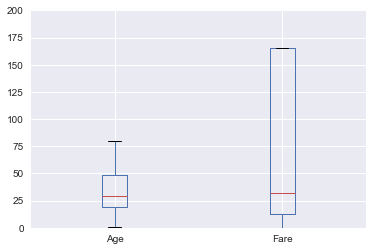

In [7]:
df.describe().loc[:, ('Age', 'Fare')].plot(kind='box', ylim=(0, 200));

**What’s the average age and how far (in years) are the average ages from the median ages for the following:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

#### Average age of all passengers

In [8]:
age_avg = df.Age.mean()
age_median = df.Age.median()
delta = age_avg - age_median

print(f'Average: {age_avg}')
print(f'Median: {age_median}')
print(f'Average - Median: {delta}')

Average: 29.69911764705882
Median: 28.0
Average - Median: 1.69911764705882


##### Average age of survivors

In [9]:
group_1 = df.Survived == 1
stats_1 = df.Age[group_1].describe()
delta = stats_1['mean'] - stats_1['50%']

print(f'Average: {stats_1["mean"]}')
print(f'Median: {stats_1["50%"]}')
print(f'Average - Median: {delta}')

Average: 28.343689655172415
Median: 28.0
Average - Median: 0.34368965517241534


##### Average age of non-surviving first-class passenger

In [10]:
group_2 = (df.Survived == 0) & (df.Pclass == 1)
stats_2 = df.Age[group_2].describe()
delta = stats_2['mean'] - stats_2['50%']

print(f'Average: {stats_2["mean"]}')
print(f'Median: {stats_2["50%"]}')
print(f'Average - Median: {delta}')

Average: 43.6953125
Median: 45.25
Average - Median: -1.5546875


##### Average age of males older than 30 from anywhere but Queenstown

In [11]:
group_3 = (df.Age > 30) & (df.Sex == 'male') & (df.Embarked != 'Q')
stats_3 = df.Age[group_3].describe()
delta = stats_3['mean'] - stats_3['50%']

print(f'Average: {stats_3["mean"]}')
print(f'Median: {stats_3["50%"]}')
print(f'Average - Median: {delta}')

Average: 43.28865979381443
Median: 40.25
Average - Median: 3.038659793814432


In [12]:
age_groups = pd.concat([stats_1, stats_2, stats_3], axis=1)
age_groups.columns = ['Survivors', 'Non-Survivor 1st Class', 'Queenstown Males Over 30']
age_groups

,Survivors,Non-Survivor 1st Class,Queenstown Males Over 30
count,290.000000,64.000000,194.000000
mean,28.343690,43.695312,43.288660
std,14.950952,15.284243,10.552321
min,0.420000,2.000000,30.500000
25%,19.000000,31.000000,35.000000
50%,28.000000,45.250000,40.250000
75%,36.000000,55.250000,49.750000
max,80.000000,71.000000,80.000000


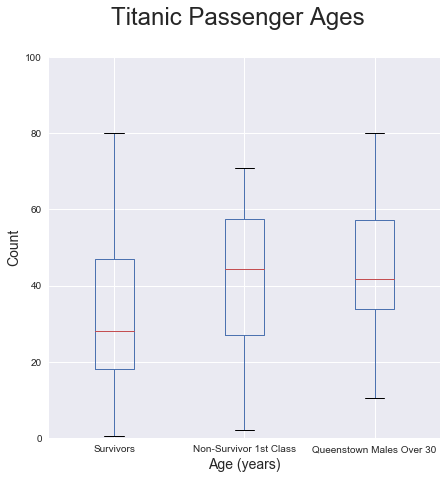

In [13]:
label_size = 14

fig = plt.figure('Titanic Passenger Ages', figsize=(7, 7),
                 facecolor='white', edgecolor='black')
ax1 = plt.subplot2grid((1, 1), (0, 0));

age_groups.plot(kind='box', ylim=(0, 100), ax=ax1);

plt.suptitle('Titanic Passenger Ages', fontsize=24);
ax1.set_xlabel('Age (years)', fontsize=label_size);
ax1.set_ylabel('Count', fontsize=label_size);

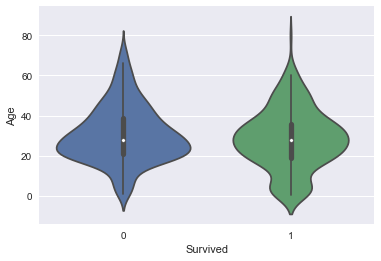

In [14]:
sns.violinplot(x='Survived', y='Age', data=df);

**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [15]:
df.Pclass.mode()
df.Embarked.mode()
df.SibSp.mode()

0    3
dtype: int64

0    S
dtype: object

0    0
dtype: int64

- The majority of passengers held 3rd class tickets.
- Most passengers boarded in Southampton
- The majority of passengers did not have any siblings or spouses onboard.

**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [16]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

- The median fare of 14.45 is within 1 standard deviation of the mean price of 32.20

**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [17]:
fare_90 = df.Fare.quantile(0.9)
fare_90
fare_5 = df.Fare.quantile(0.05)
fare_5

fare_90 - fare_5

df.Pclass[df.Fare == fare_90].groupby(df.Pclass).count()
df.Pclass[df.Fare == fare_5].groupby(df.Pclass).count()

77.9583

7.225

70.7333

Pclass
1    3
Name: Pclass, dtype: int64

Pclass
3    12
Name: Pclass, dtype: int64

- The 90th percentile fare (77.96) was 70.73 higher than the 5th percentile fare (7.23).
- All three of the tickets sold at the 90th percentile fare were for 1st class cabins.
- The 12 tickets sold at the 5th percentile fare were all for 3rd class cabins.

**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [18]:
df.Fare.groupby(df.Embarked).mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

- Passengers from Cherbourg paid the highest average fare.

**What is the most common passenger class for each port?**

In [19]:
embark_classes = df.PassengerId.groupby((df.Embarked, df.Pclass)).count()
embark_classes

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: PassengerId, dtype: int64

- The most common passenger class from each port was the following:
    - Cherbourg: 1st
    - Queenstown: 3rd
    - Southampton: 3rd

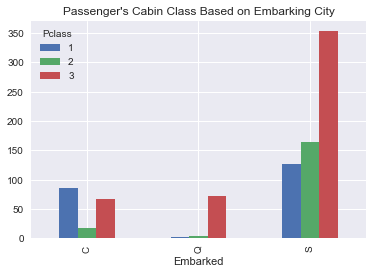

In [20]:
embark_classes.unstack().plot(
    kind='bar',
    title="Passenger's Cabin Class Based on Embarking City");

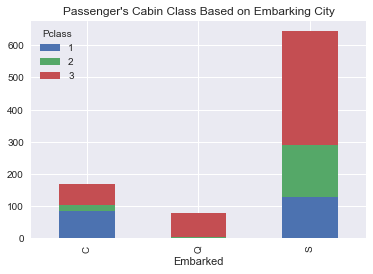

In [21]:
embark_classes.unstack().plot(
    kind='bar',
    stacked=True,
    title="Passenger's Cabin Class Based on Embarking City");

**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [22]:
group = (df.Sex == 'male') & (df.Pclass == 1) & (df.Survived == 1)
stats_m = df.Fare[group].describe()
count = df.Fare[group & (df.Fare < (2 * df.Fare.median()))].count()

print(f'Double the Overall Median Fare: {df.Fare.median() * 2}')
print('Percent of surviving 1st-class males fare below double the overall'
      f'median fare: {count / stats_m["count"] * 100:.1f}%')

Double the Overall Median Fare: 28.9084
Percent of surviving 1st-class males fare below double the overallmedian fare: 24.4%


- 24.4% of the surviving 1st class males paid lower than double the overall median ticket price.

In [23]:
fare_comp = pd.concat([df.Fare[group].describe(), df.Fare.describe()], axis=1)
fare_comp.columns = ['survive_1st_class_male', 'all_fares']

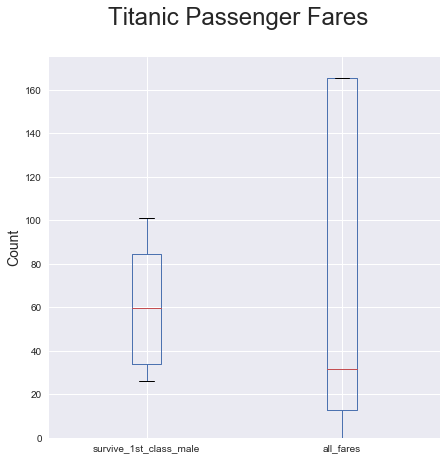

In [24]:
label_size = 14

fig = plt.figure('Titanic Passenger Fares', figsize=(7, 7),
                 facecolor='white', edgecolor='black')
ax1 = plt.subplot2grid((1, 1), (0, 0));

fare_comp.plot(kind='box', ax=ax1, ylim=(0, 175))

plt.suptitle('Titanic Passenger Fares', fontsize=24);
ax1.set_ylabel('Count', fontsize=label_size);

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [25]:
family = df.Age[(df.SibSp > 0) | (df.Parch > 0) & (df.Survived == 1)].describe()
single = df.Age[(df.SibSp == 0) & (df.Parch == 0) & (df.Survived == 0)].describe()

family['mean'] - single['mean']

-6.7296155210867816

- The average surviving passenger with family members on board was 6.7 years younger than the single passengers who did not survive.

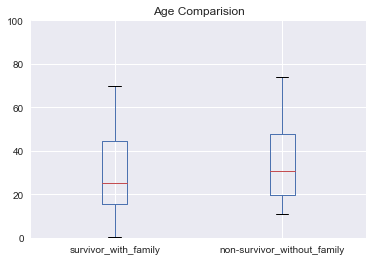

In [26]:
family = pd.concat([family, single], axis=1)
family.columns = ['survivor_with_family', 'non-survivor_without_family']
family.plot(kind='box', title='Age Comparision', ylim=(0, 100));

**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

In [27]:
survival_rate = []
quantiles = np.linspace(0, 1, 21)
for n in quantiles:
    quantile_fare = df.Fare.quantile(n)
    survive = df.PassengerId[(df.Survived == 1) & (df.Fare <= quantile_fare)].count()
    total = df.PassengerId[df.Fare <= quantile_fare].count()

    survival_rate.append(survive / total * 100)

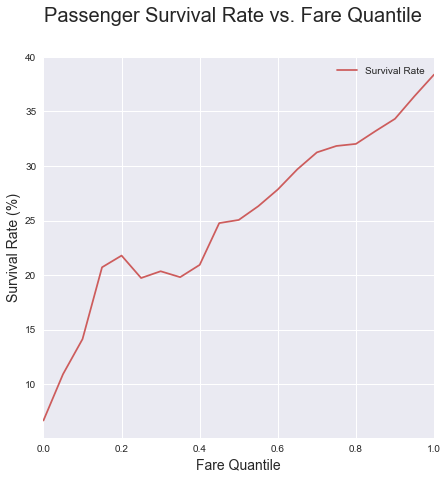

In [28]:
label_size = 14

fig = plt.figure('Titanic Passenger Survival Rate vs. Fare Quantile',
                 figsize=(7, 7), facecolor='white', edgecolor='black')
ax1 = plt.subplot2grid((1, 1), (0, 0));

data = pd.DataFrame({'Fare Quantile': quantiles,
                     'Survival Rate': survival_rate})
data.plot(x='Fare Quantile', y='Survival Rate', color='indianred', ax=ax1)

plt.suptitle('Passenger Survival Rate vs. Fare Quantile', fontsize=20);
ax1.set_xlabel('Fare Quantile', fontsize=label_size);
ax1.set_ylabel('Survival Rate (%)', fontsize=label_size);

**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [29]:
df.loc[:, ['Age', 'Fare', 'SibSp', 'Parch']].mean()

Age      29.699118
Fare     32.204208
SibSp     0.523008
Parch     0.381594
dtype: float64

**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [30]:
df.PassengerId.groupby((df.SibSp, df.Parch)).count()

SibSp  Parch
0      0        537
       1         38
       2         29
       3          1
       4          1
       5          2
1      0        123
       1         57
       2         19
       3          3
       4          3
       5          3
       6          1
2      0         16
       1          7
       2          4
       3          1
3      0          2
       1          7
       2          7
4      1          9
       2          9
5      2          5
8      2          7
Name: PassengerId, dtype: int64

In [31]:
df.PassengerId[df.Age.isnull()].count() / 891 * 100

19.865319865319865

In [32]:
df.PassengerId[df.Fare.isnull()].count() / 891 * 100

0.0

- Do not focus on family.
    - 60% of the passengers were not traveling with family.  Focusing on these traits vastly reduce the data set.

- Fare
    - This attribute is worth investigating, but has a very large spread (see box plot towords the top).
    - Every person has an entry for this field.

- Age
    - This attribute is also worth further investigation
    - 20% of the passengers do not have a data entry for this field.

**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

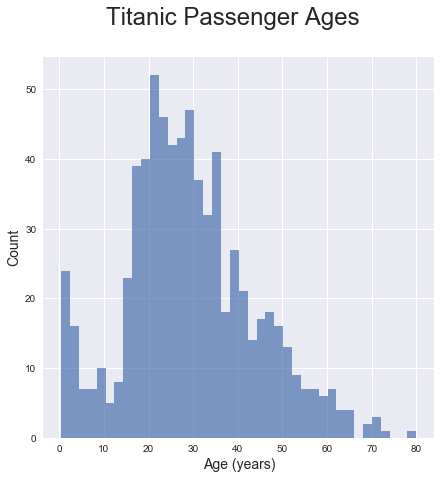

In [33]:
label_size = 14

fig = plt.figure('Titanic Passenger Ages', figsize=(7, 7),
                 facecolor='white', edgecolor='black')
ax1 = plt.subplot2grid((1, 1), (0, 0));

df.Age.plot(kind='hist', bins=40, alpha=0.7, ax=ax1);

plt.suptitle('Titanic Passenger Ages', fontsize=24);
ax1.set_xlabel('Age (years)', fontsize=label_size);
ax1.set_ylabel('Count', fontsize=label_size);

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was between 25 and 40 years old
- A passenger was either younger than 20 years old or older than 50

In [34]:
passenger_total = df.shape[0]

In [35]:
df.PassengerId[df.Survived == 1].count() / passenger_total * 100

38.383838383838381

- 38.4% of the passengers survived

In [36]:
df.PassengerId[df.Sex == 'male'].count() / passenger_total * 100

64.758698092031437

- 64.8% of the passengers were male

In [37]:
df.PassengerId[(df.Sex == 'female') & (df.SibSp > 0)].count() / passenger_total * 100

15.712682379349047

15.7% of the passengers were female with at least one sibling or souse onboard

In [38]:
df.PassengerId[(df.Survived == 1) & (df.Embarked == 'C')].count() / passenger_total * 100

10.437710437710438

- 10.4% of the survivors were from Cherbourg

In [39]:
df.PassengerId[df.Age < 10].count() / passenger_total * 100

6.9584736251402921

- 7% of the passengers were under the age of 10

In [40]:
df.PassengerId[(25 < df.Age) & (df.Age < 40)].count() /passenger_total * 100

28.058361391694724

- 28% of the crew was between the ages of 25 and 40

In [41]:
df.PassengerId[(50 < df.Age) | (df.Age < 20)].count() /passenger_total * 100

25.589225589225588

- 25.6% of the passengers were over 50 or under 20 years old



**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

- Survived: 342 / 891

In [42]:
stats.binom.pmf(k=42, n=100, p=0.384)

0.061481801021581461

- 6.1% chance exactly 42 passengers would survive

**What’s the probability that at least 42 of those 100 passengers survive?**

In [43]:
1 - stats.binom.cdf(k=41, n=100, p=0.384)

0.26049293242654348

**Write a function that takes N random samples of 100 passengers, and returns the fraction of those samples where at least 42 passengers survive.**

Choose a random seed and find approximately how many random samples you need to take before your fraction matches the probability you calculated (within Δp≈0.05Δp≈0.05).

It may help to visualize the survival fraction vs the number of random samples. Answers will vary based on the seed.

In [44]:
def random_42(n):
    life_death = stats.binom.rvs(n=n, p=0.384, size=100)
    return life_death[life_death > 41].shape[0] / 100

In [45]:
p_42 = 0.26
delta_p = 1
n = 0
while(delta_p > 0.05):
    n += 1
    prob = random_42(n)
    delta_p = abs(prob - p_42)
    
print(n)

96


**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**If so, at what level? If not, how do you know?**

In [46]:
males = df.Age[(df.Sex == 'male') & (df.Survived == 1)]
females = df.Age[(df.Sex == 'female') & (df.Survived == 1)]
survive_sex = pd.concat([males, females], axis=1)
survive_sex.columns = ['Male Survivors', 'Female Survivors']

In [47]:
survive_sex.describe()

,Male Survivors,Female Survivors
count,93.000000,197.000000
mean,27.276022,28.847716
std,16.504803,14.175073
min,0.420000,0.750000
25%,18.000000,19.000000
50%,28.000000,28.000000
75%,36.000000,38.000000
max,80.000000,63.000000


- Null Hypothesis: There is no difference between the probablility of survival based on sex.

In [48]:
stats.ttest_1samp(a=males[males.notnull()], popmean=df.Age[df.Survived == 1].mean())

Ttest_1sampResult(statistic=-0.62383166680367896, pvalue=0.53428188616790262)

In [49]:
stats.ttest_1samp(a=females[females.notnull()], popmean=df.Age[df.Survived == 1].mean())

Ttest_1sampResult(statistic=0.49906926834101317, pvalue=0.61829027035020445)

In [50]:
p_value_sex = stats.ttest_ind(a=males[males.notnull()],
                              b=females[females.notnull()],
                              equal_var=False)
p_value_sex

Ttest_indResult(statistic=-0.79089662277024664, pvalue=0.43018823932007377)

- There is a 43% chance the survival data with respect to sex would have the given distributions given that the male and female data was identical. 

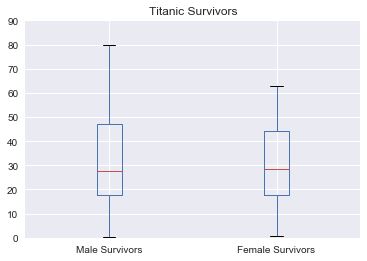

In [51]:
survive_sex.describe().plot(kind='box', title='Titanic Survivors', ylim=(0, 90));

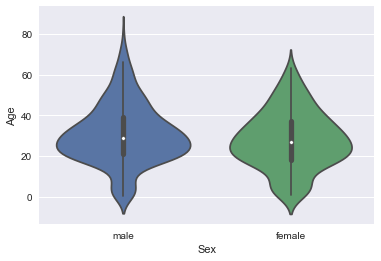

In [52]:
sns.violinplot(x='Sex', y='Age', data=df);

**The fares paid by passengers from Queenstown and the passengers from Cherbourg?**

In [53]:
cher = df.Fare[df.Embarked == 'C']
queen = df.Fare[df.Embarked == 'Q']

compare_fare = pd.concat([cher, queen], axis=1)
compare_fare.columns = ['Cherbourg', 'Queenstown']

In [54]:
compare_fare.describe()

,Cherbourg,Queenstown
count,168.000000,77.000000
mean,59.954144,13.276030
std,83.912994,14.188047
min,4.012500,6.750000
25%,13.697950,7.750000
50%,29.700000,7.750000
75%,78.500025,15.500000
max,512.329200,90.000000


- Null Hypothesis: There is no difference between the Fare price based on Embark town.

In [55]:
stats.ttest_1samp(a=cher, popmean=df.Fare.mean())

Ttest_1sampResult(statistic=4.2863478225243004, pvalue=3.0619525228593012e-05)

In [56]:
stats.ttest_1samp(a=queen, popmean=df.Fare.mean())

Ttest_1sampResult(statistic=-11.706621004621377, pvalue=1.1012346605163913e-18)

In [57]:
p_value_embark = stats.ttest_ind(a=cher, b=queen, equal_var=False)
p_value_embark

Ttest_indResult(statistic=6.9951971047186809, pvalue=4.5792033919567422e-11)

- There is a 0% percent chance the fares paid by passengers in Cherboug are similar to the fares paid by passengers in Queenstown.

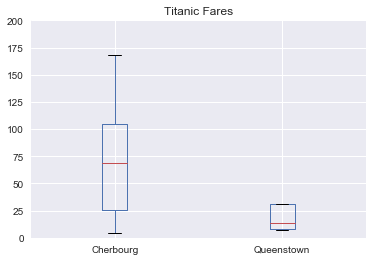

In [58]:
compare_fare.describe().plot(kind='box', title='Titanic Fares', ylim=(0, 200));

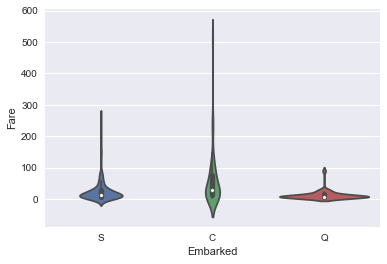

In [59]:
sns.violinplot(x='Embarked', y='Fare', data=df);

**Accompany your p-values with histograms showing the distributions of both compared populations.**

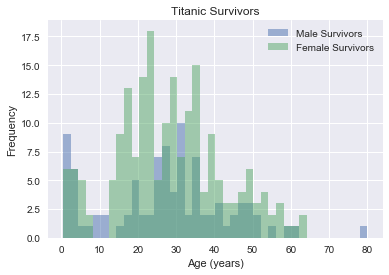

In [60]:
ax = survive_sex.plot(kind='hist', alpha=0.5, bins=40, title='Titanic Survivors');
ax.set_xlabel('Age (years)');

In [61]:
print(f'Male Female Age p-value: {p_value_sex[1]:.5f}')

Male Female Age p-value: 0.43019


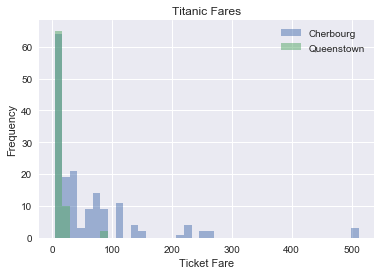

In [62]:
ax = compare_fare.plot(kind='hist', alpha=0.5, bins=40, title='Titanic Fares')
ax.set_xlabel('Ticket Fare');

In [63]:
print(f'Embark Location Fares p-value: {p_value_embark[1]:.5f}')

Embark Location Fares p-value: 0.00000


**Did survivors pay more for their tickets than those that did not? If so, to what significance level?**

In [64]:
live_fare = df.Fare[df.Survived == 1].describe()
death_fare = df.Fare[df.Survived == 0].describe()
live_fare
death_fare
df.Fare[(df.Survived == 0) & (df.Fare > 26)].count() / death_fare['count'] * 100

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

23.679417122040071

- The mean and median of the survivor's fares were more than double those who did not survive.
- 23.7% of the passengers who died paid a fare equal to or greater than the average fare of those who survived.

**Did a given first-class passenger have less family members on board than a given third-class passenger? If so, to what significance level?**

In [65]:
df['Family'] = [1 if x or y else 0 for x, y in zip(df.SibSp, df.Parch)]
df.PassengerId.groupby((df.Pclass, df.Family)).count()

Pclass  Family
1       0         109
        1         107
2       0         104
        1          80
3       0         324
        1         167
Name: PassengerId, dtype: int64

In [66]:
df.SibSp.groupby(df.Pclass).count()

Pclass
1    216
2    184
3    491
Name: SibSp, dtype: int64

In [67]:
107 / 216 - 167 / 491

0.1552481707777023

- 15.5% more of 1st class passengers were traveling as families compared to the 3rd class passengers.